<a href="https://colab.research.google.com/github/raza33010/Road-Accident-Predicton-By-Vehicle-Type/blob/main/OEL_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
missing_values=["N/a", "na", np.nan]
df = pd.read_csv('Road Accident Data.csv' , na_values = missing_values)


**1. EDA and Data Cleaning**

In [3]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.shape

(22930, 21)

In [5]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22930 entries, 0 to 22929
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident_Index              22930 non-null  object 
 1   Accident Date               22930 non-null  object 
 2   Day_of_Week                 22930 non-null  object 
 3   Junction_Control            22930 non-null  object 
 4   Junction_Detail             22930 non-null  object 
 5   Accident_Severity           22930 non-null  object 
 6   Latitude                    22930 non-null  float64
 7   Light_Conditions            22930 non-null  object 
 8   Local_Authority_(District)  22930 non-null  object 
 9   Carriageway_Hazards         177 non-null    object 
 10  Longitude                   22930 non-null  float64
 11  Number_of_Casualties        22930 non-null  int64  
 12  Number_of_Vehicles          22930 non-null  int64  
 13  Police_Force                229

In [7]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,22930.000000,22930.000000,22930.000000,22930.000000,22930.000000
mean,51.510001,-0.121946,1.203184,1.774313,31.070650
std,0.066737,0.144499,0.565265,0.621165,4.867361
min,51.295164,-0.509884,1.000000,1.000000,20.000000
25%,51.467166,-0.205583,1.000000,1.000000,30.000000
50%,51.513674,-0.116049,1.000000,2.000000,30.000000
75%,51.555412,-0.036611,1.000000,2.000000,30.000000
max,51.690113,0.297740,11.000000,9.000000,70.000000


In [8]:
df.nunique()

Accident_Index                22930
Accident Date                   365
Day_of_Week                       7
Junction_Control                  5
Junction_Detail                   9
Accident_Severity                 4
Latitude                      19755
Light_Conditions                  5
Local_Authority_(District)       34
Carriageway_Hazards               5
Longitude                     20192
Number_of_Casualties             11
Number_of_Vehicles                9
Police_Force                      2
Road_Surface_Conditions           5
Road_Type                         5
Speed_limit                       6
Time                           1376
Urban_or_Rural_Area               2
Weather_Conditions                8
Vehicle_Type                     15
dtype: int64

In [9]:
df.isnull().sum()

Accident_Index                    0
Accident Date                     0
Day_of_Week                       0
Junction_Control                  0
Junction_Detail                   0
Accident_Severity                 0
Latitude                          0
Light_Conditions                  0
Local_Authority_(District)        0
Carriageway_Hazards           22753
Longitude                         0
Number_of_Casualties              0
Number_of_Vehicles                0
Police_Force                      0
Road_Surface_Conditions           0
Road_Type                         5
Speed_limit                       0
Time                              0
Urban_or_Rural_Area               0
Weather_Conditions               88
Vehicle_Type                      0
dtype: int64

In [10]:
# Drop Unbalanced columns
df.drop(columns='Carriageway_Hazards', inplace=True)

# Fill missing values with most frequent values
most_freq_surface_conditions = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = df['Road_Type'].mode()[0]
df['Road_Type'].fillna(most_freq_road_type, inplace=True)

#replace vales in Accident_Severity columns
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

#drop unwanted columns
df.drop(columns=['Latitude', 'Longitude','Junction_Control','Local_Authority_(District)','Police_Force'], inplace=True)

In [11]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions to fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(conditions_mapping), inplace=True)
df['Weather_Conditions'].fillna('Other', inplace=True)

In [12]:
# Extract  only the daily hour of each accident
df['Time']= df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean of the 'Time' column
mean_time = df['Time'].mean().round(0)

# Fill missing values in the 'Time' column with the calculated mean
df['Time'].fillna(mean_time, inplace=True)

# Rename Columns name
df = df.rename(columns={'Accident_Severity': 'Accident_Injuries', 'Number_of_Casualties': 'death_toll' , 'Accident_Index': 'Accident_ID' , 'Time':'Hour_of_Accident'})

In [13]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = pd.pivot_table(df, values='death_toll', index=[ 'Accident Date'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,2.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,1.0,NaN
1/10/2021,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0
1/11/2021,2.0,1.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0
1/12/2021,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN
1/13/2021,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2021,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,2.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN
9/6/2021,1.0,1.0,2.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
9/7/2021,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [14]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

df['Vehicle_Type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       nan], dtype=object)

**2. Data Visualization**

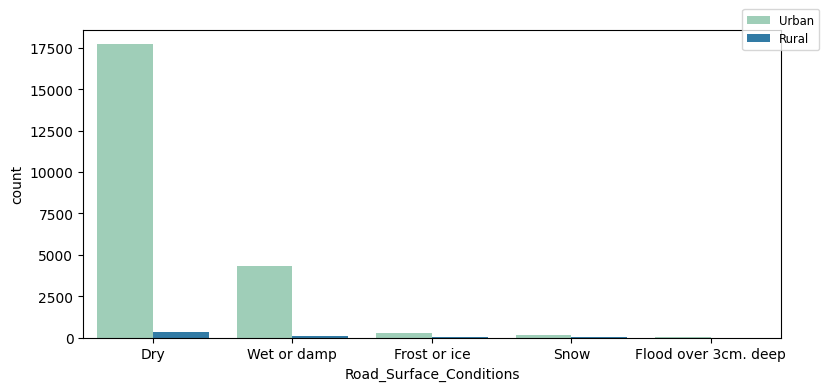

In [15]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(9, 4))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=df, x='Road_Surface_Conditions', palette="YlGnBu", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')
plt.show()

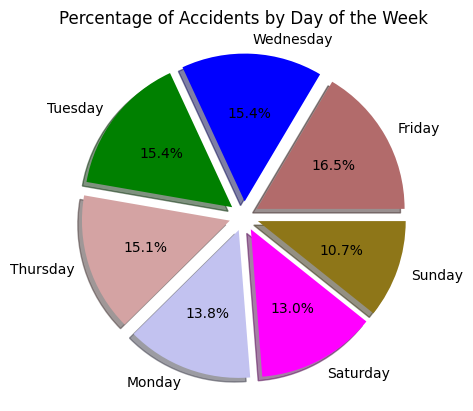

In [16]:
#make a pie chart to display thee percentage of accident per each day
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors= ['#B26B6B', '#0000ff', '#008000', '#d4a3a3', '#c2c2f0', '#ff00ff', '#8e7618'])
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')
plt.show()

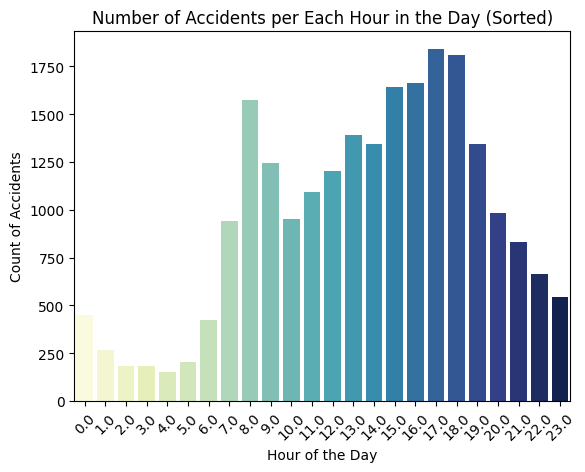

In [17]:
# Create a Bar plot to display the number of accidents per each hour in the day
df_sorted = df.sort_values(by='Hour_of_Accident')
sns.countplot(data=df_sorted, x='Hour_of_Accident', hue='Hour_of_Accident', palette="YlGnBu", dodge=False, legend=False)
plt.title('Number of Accidents per Each Hour in the Day (Sorted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =45)
plt.show()

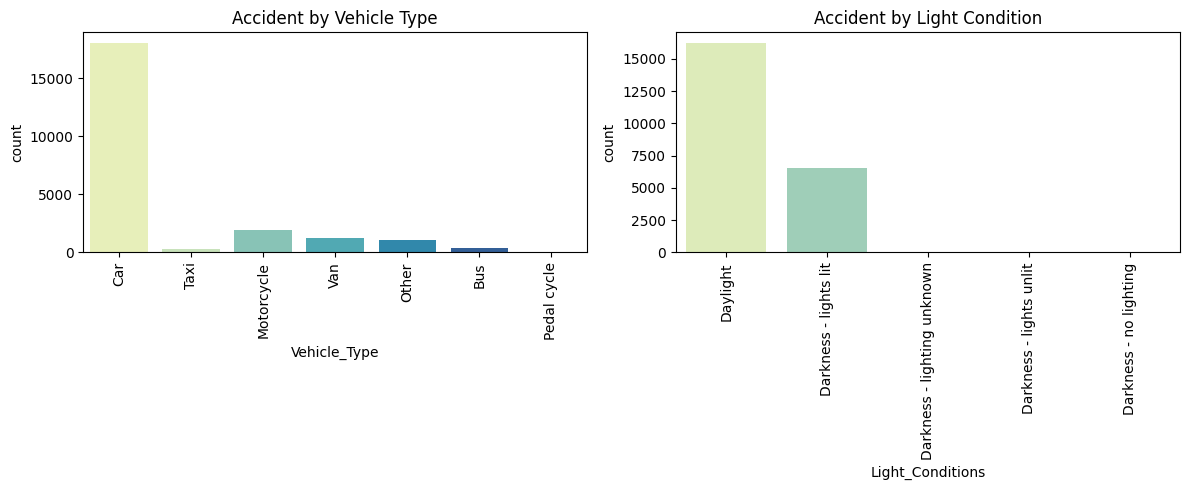

In [18]:
plt.figure(figsize=(12, 5))

# First subplot: Accident by vehicle type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Vehicle_Type",  hue="Vehicle_Type", palette="YlGnBu", dodge=False, legend=False)
plt.title('Accident by Vehicle Type')
plt.xticks(rotation=90)

# Second subplot: Accident by light condition
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Light_Conditions",hue="Light_Conditions", palette="YlGnBu", dodge=False, legend=False)
plt.title('Accident by Light Condition')
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()


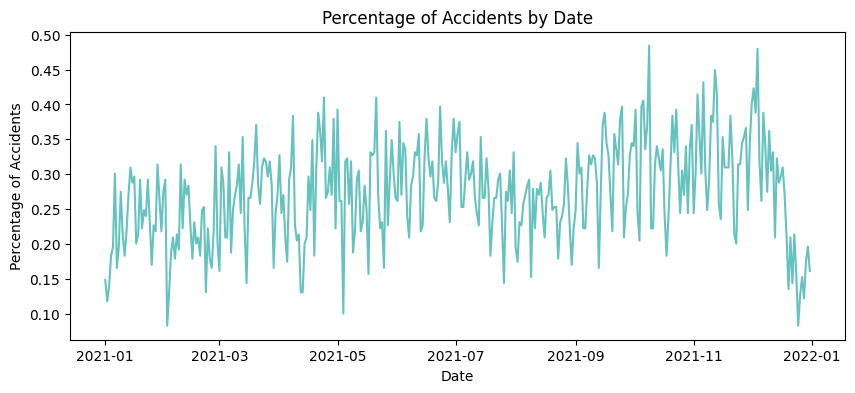

In [19]:
# Create a line chart to calculate the percentage of accidents for each date
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
date_counts = df['Accident Date'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 4))
sns.lineplot(x=date_counts.index, y=date_counts.values, color=sns.color_palette("YlGnBu")[2])
plt.title('Percentage of Accidents by Date')
plt.xlabel('Date')
plt.ylabel('Percentage of Accidents')
plt.show()

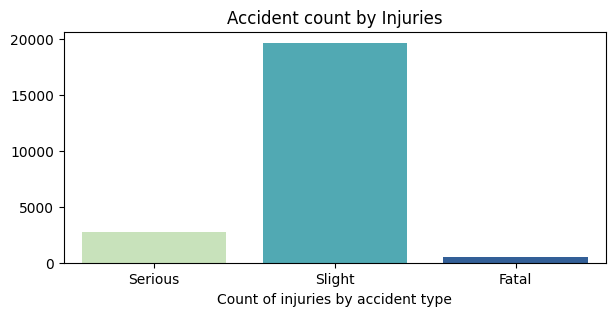

In [20]:
# Create a count plot to show the number of accident by Accident_Severity
plt.figure(figsize=(7,3))
sns.countplot(data = df, x='Accident_Injuries', hue = 'Accident_Injuries' ,palette ='YlGnBu', dodge=False, legend=False )
plt.title('Accident count by Injuries')
plt.xlabel('Count of injuries by accident type')
plt.ylabel('')
plt.show()

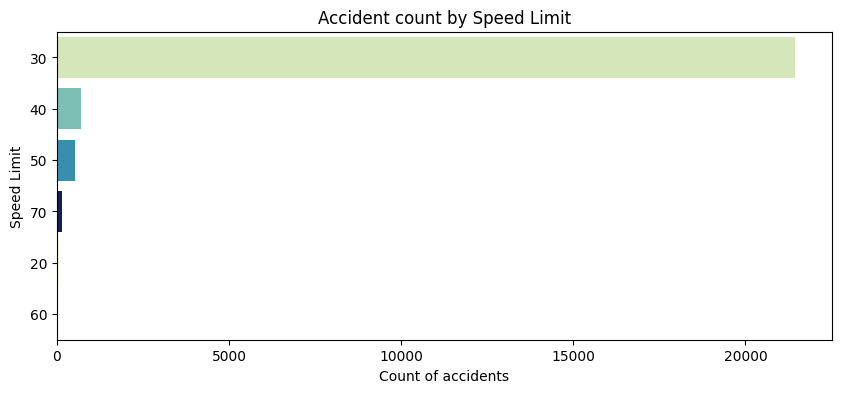

In [21]:
# Bar plot to show what is the most common accident speed limit
plt.figure(figsize = (10,4))
sns.countplot(data=df, y='Speed_limit', hue= 'Speed_limit', order=df['Speed_limit'].value_counts().index, palette='YlGnBu', dodge=False, legend=False )
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')
plt.show()

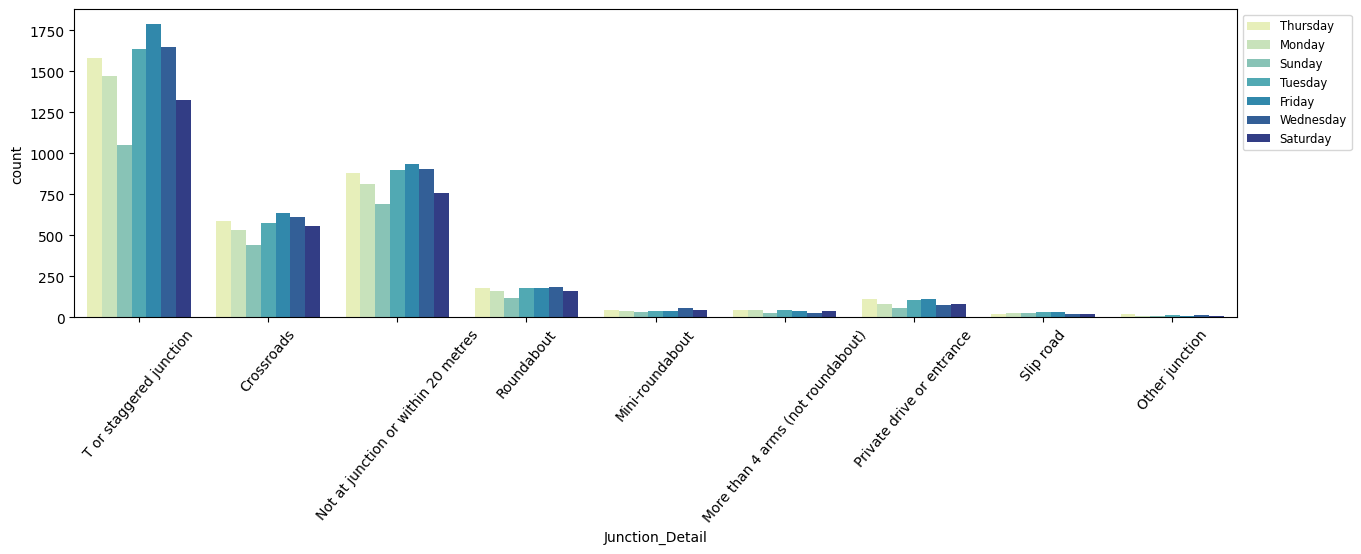

In [22]:
# Count of accident by hunction details for each day in the week
plt.figure(figsize=(15,4))
sns.countplot(data=df, x= 'Junction_Detail' ,palette="YlGnBu", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df.to_csv('Accident_Dataset.csv', index=False)

In [ ]:
from google.colab import files

files.download('Accident_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Engineering**

In [ ]:
# import pandas as pd

# # Define what values should be considered as missing
# missing_values = ["n/a", "na", "--"]

# # Load the dataset
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Road Accident Data.csv', na_values=missing_values)

# # Display the current features
# print("Current Features:")
# print(df.columns)

# # Display the first few rows of the dataframe to see the features
# print("First few rows of the dataframe:")
# print(df.head())



**Model Building**

In [ ]:
# linear regression, lab 5
# logistic regression, lab 6
# decision trees, lab 8
# random forests,  lab 10
# support vector machines lab 9